# Organizing, Subsetting and Processing Data

Now that you've successfully downloaded the GRACE and GLDAS data, you will need to read in and process the data to get groundwater anamoly estimates. Both datasets have raw data contained in .nc or .nc4 files. These are files for storing multi-dimensional data--in our case, the key dimensions we are interested in are latittude and longitude (geography) and time. We can use the `xarray` package to read in these data. 

### Reading in GRACE Data

The GRACE MASCON data is contained in 1 .nc file and contains global land MASCON GRACE data. We start by using `xarray` to read in the data. 

In [2]:
import xarray as xr
import os

os.environ['HDF5_USE_FILE_LOCKING']='FALSE'

In [5]:
# Need to change this to relative path later
grace_df = xr.open_dataset("/home/kmk58/remoteData/GRACE_MASCON/data/TELLUS_GRAC-GRFO_MASCON_CRI_GRID_RL06.1_V3/GRCTellus.JPL.200204_202304.GLO.RL06.1M.MSCNv03CRI.nc") 

Let's begin by inspecting and understanding the data. After running the command below, you can interact with the output to inspect and understand the data. 

In [7]:
grace_df

<xarray.Dataset>
Dimensions:        (lon: 720, lat: 360, time: 220, bounds: 2)
Coordinates:
  * lon            (lon) float64 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat            (lat) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * time           (time) datetime64[ns] 2002-04-17T12:00:00 ... 2023-04-16
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (time, lat, lon) float64 ...
    uncertainty    (time, lat, lon) float64 ...
    lat_bounds     (lat, bounds) float64 ...
    lon_bounds     (lon, bounds) float64 ...
    time_bounds    (time, bounds) datetime64[ns] ...
    land_mask      (lat, lon) float64 ...
    scale_factor   (lat, lon) float64 ...
    mascon_ID      (lat, lon) float64 ...
Attributes: (12/53)
    Conventions:                   CF-1.6, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         JPL GRACE and GRACE-FO MASCON RL06.1Mv03 CRI
    summary:                       Monthly gravity solutions from GRACE and G...
    keywords:                      Solid Earth, Geodetics/Gravity, Gravity, l...
    ...                            ...
    C_30_substitution:             TN-14; Loomis et al., 2019, Geophys. Res. ...
    user_note_1:                   The accelerometer on the GRACE-B spacecraf...
    user_note_2:                   The accelerometer on the GRACE-D spacecraf...
    journal_reference:             Watkins, M. M., D. N. Wiese, D.-N. Yuan, C...
    CRI_filter_journal_reference:  Wiese, D. N., F. W. Landerer, and M. M. Wa...
    date_created:                  2023-06-28T21:06:45Z

The first thing you will note is that the dataset has several dimensions: `lon`, `lat`, `time`, and `bounds`. This is because the GRACE data come at the pixel-level for each year. In our sitution, a pixel is the smallest geographic unit of analysis. Because collecting and processing GRACE satellite data is technical and compuationally expensive, GRACE measurements are given as .5-degree by .5-degree squares. The pixels cover the entire Earth's surface and each have a GRACE measurement monthly from 2003-present. A visual of this is shown below, where each square in the GRID correponds to a pixel (Sharma, Patnaik, Biswal, Reager, 2020). Note that the yellow dots are gauging stations for comparison. 

![GRACE Data Grids and Gauging Stations][def]




[def]: home/kmk58/DSSG2023-Groundwater/notebooks-and-markdowns/GRACE_grids.png


### GLDAS Data 

Next, we will read in the GLDAS data which provides us with information on snow pack and soil moisture. 

## Subsetting The Data 

You will likely only want to do analysis on a specific region in the world. As such, you should subset your data to focus your analysis on this region. For most use cases, it will make the most sense to load in a shapefile and use this file to narrow down your region. This will allow your analysis to focus on your area of interest as precisely as possible. 

#### What is a Shapefile? 

A shapefile is a file that stores geometric location and attribute information of geographical features in a nontopological way. Shapefiles represent geographical features by points, lines, or polygons (geographical areas) (ArcGIS). It is one of the simpler ways to store and work with geographic data. Many shapefiles are publicly available for download by government agencies, researchers, or practitioners. Below is an example of what a shapefile looks like in tabular form and how you can go from that to a map.

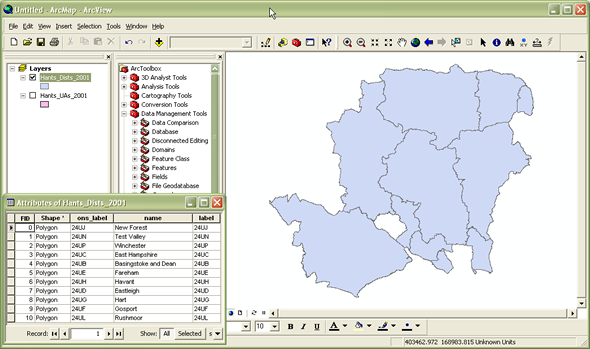
Source: ReStore

#### Applying This Method to the CRB 

Below, we use this method to use a shapefile of the Colorado River Basin for analysis. You can download the shape file for the Colorado River Basin from ArcGIS hub [here](https://coloradoriverbasin-lincolninstitute.hub.arcgis.com/datasets/colorado-river-basin-hydrological-boundaries-with-areas-served-by-colorado-river/explore?location=36.244092%2C-110.573590%2C6.00). A visual of this is shown below: 

![](home/kmk58/DSSG2023-Groundwater/notebooks-and-markdowns/GRACE_grids.png)

<img src='home/kmk58/DSSG2023-Groundwater/notebooks-and-markdowns/GRACE_grids.png'>

To work with shapefiles, we will use the `geopandas` package, a spatial analysis package built on top of `pandas`. We will begin by loading in this package and reading in the shapefile. Next, we will load in plotting functions from `matplotlib` and map the shapefile. 

<Figure size 1000x1000 with 0 Axes>

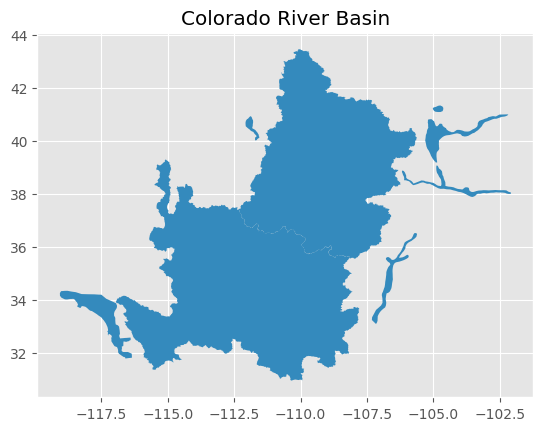

In [2]:
# min/max of lat/long then go from there. 
import geopandas as gpd 
import matplotlib.pyplot as plt

crb = gpd.read_file("/home/kmk58/remoteData/shapefiles/Colorado_River_Basin_Hydrological_Boundaries_with_Areas_served_by_Colorado_River.shp")

# plot of entire Colorado River Basin
plt.style.use('ggplot')
plt.figure(figsize=[10,10])
crb.plot()
plt.title("Colorado River Basin")
plt.show()

As you can see from the output above, the shapefile is mapped with lattitude on the x-axis and longitude on the y-axis. We can easily discern the area of the Colorado River Basin. 

## Citations

(Sharma D, Patnaik S, Biswal B, Reager JT. Characterization of Basin-Scale Dynamic Storage–Discharge Relationship Using Daily GRACE Based Storage Anomaly Data. Geosciences. 2020; 10(10):404. https://doi.org/10.3390/geosciences10100404). 

Merging shapefiles in ArcGIS. (n.d.). Retrieved July 24, 2023, from https://www.restore.ac.uk/geo-refer/91010mwors01y00000000.php


